In [959]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
plt.style.use('default')

churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop(['RowNumber', 'Surname'], axis=1)                           # Удаляем ненужные столбцы

cols_to_exclude = ['CustomerId', 'Balance', 'Age', 'Tenure','EstimatedSalary', 'Exited'] # список столбцов, которые мы не берём во внимание
max_unique_count = 20                                                                    # задаём максимальное число уникальных категорий
for col in churn_data.columns:                                                           # цикл по именам столбцов
    if churn_data[col].nunique() < max_unique_count and col not in cols_to_exclude:      # проверяем условие
        churn_data[col] = churn_data[col].astype('category')                             # преобразуем тип столбца
        

## Задание 9.1

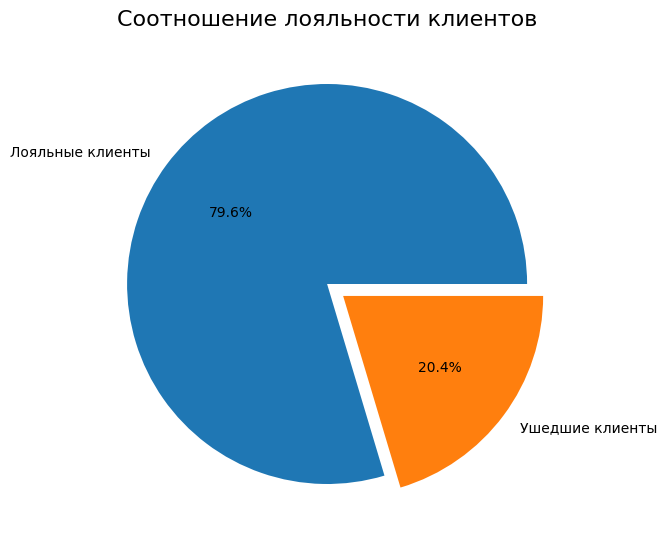

In [960]:
exited_count = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_count,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0, 0.1]
)
axes.set_title('Соотношение лояльности клиентов', fontsize=16);

Из всех пришедших клиентов уходят около 20%. Возможно процент лояльных клиентов возможно увеличить, если удастся заинтересовать их новыми продуктами или дополнительными льготными условиями.

## Задание 9.2

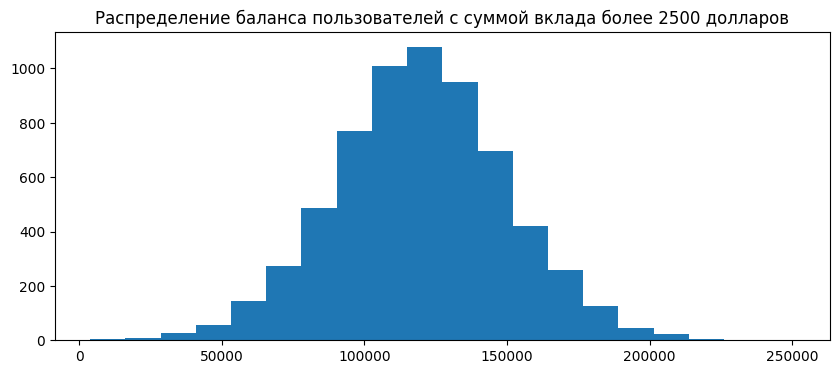

In [961]:
churn_data_balance = churn_data[churn_data['Balance'] > 2500]     # отбор клиентов с балансом более 2500 долларов

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
axes.hist(x=churn_data_balance['Balance'],
             bins = 20)
axes.set_title('Распределение баланса пользователей с суммой вклада более 2500 долларов');

Основная масса пользователей со значительными вкладами - это пользователи с суммами вкладов примерно от 80 до 170 тысяч долларов.

Вывод: Как вариант можно попытаться заинтересовать вкладчиков нарастить свои вклады до 200 тысяч долларов и более дополнительными условиями при увеличении сумм вкладов. 

## Задание 9.3

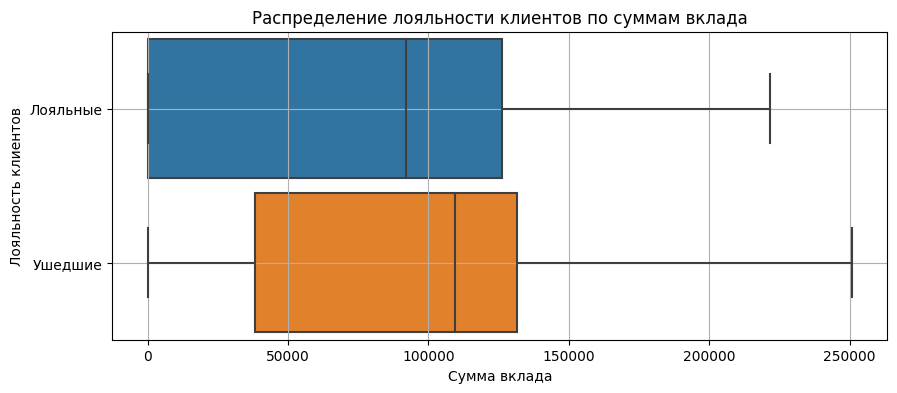

In [962]:
churn_data_exited = churn_data.copy()
churn_data_exited['Exited'] = churn_data_exited['Exited'].astype('category') # преобразуем тип столбца
churn_data_exited['Exited'].cat.categories = ['Лояльные', 'Ушедшие']
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data_exited,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение лояльности клиентов по суммам вклада');
boxplot.set_xlabel('Сумма вклада');
boxplot.set_ylabel('Лояльность клиентов');
boxplot.grid()

Среди ушедших клиентов большее количество тех, кто имел крупные суммы вкладов. Вполне возможно, что у конкурентов для себя они увидели более выгодные условия.

## Задание 9.4

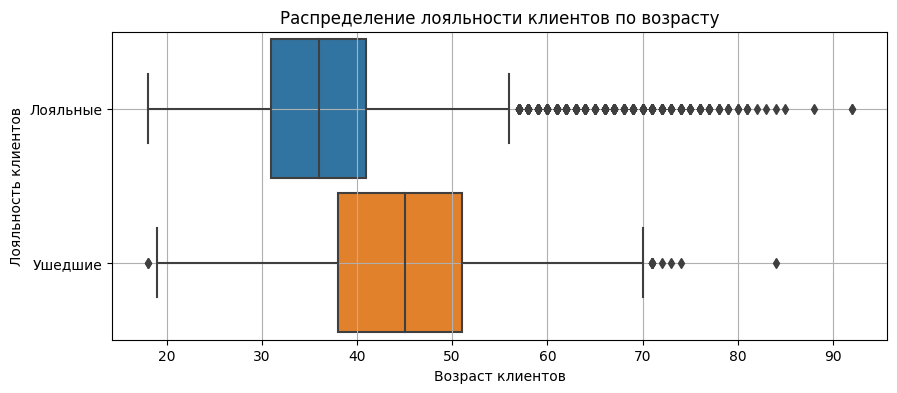

In [963]:
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data_exited,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение лояльности клиентов по возрасту');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Лояльность клиентов');
boxplot.grid()

В группе лояльных клиентов значительно большее количество потенциальных выбросов среди клиентов старше 55 лет.

Следует обратить внимание на возрастную группу старше 40 лет, так как именно в этой возрастной группе большинство клиентов покинули банк.

## Задание 9.5

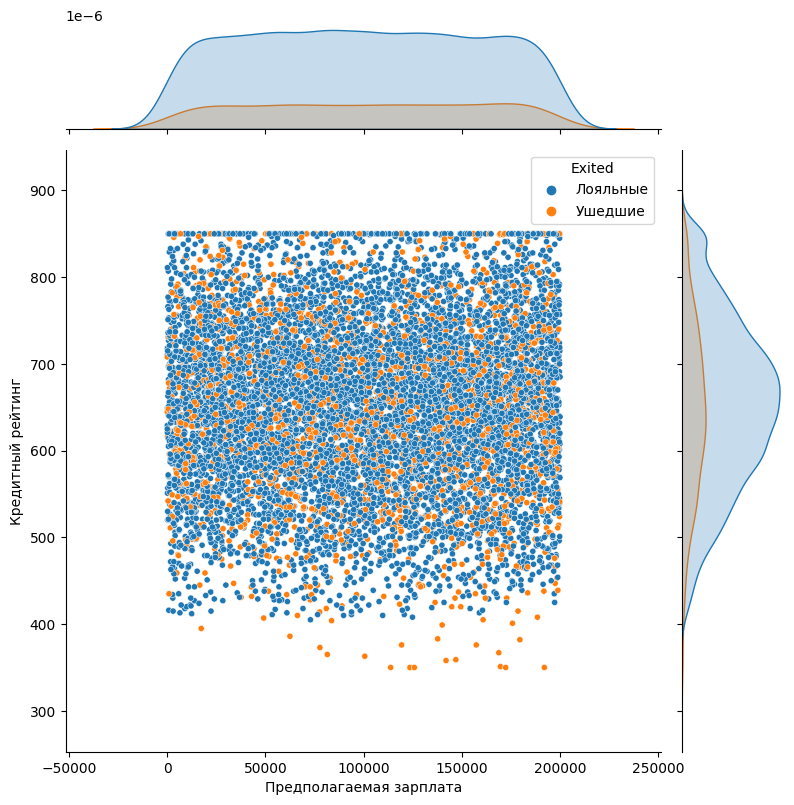

In [964]:
jointplot = sns.jointplot(
    data=churn_data_exited, 
    x='EstimatedSalary', 
    y='CreditScore',
    s=20,
    hue='Exited',
    height=8,
);
jointplot.set_axis_labels(xlabel='Предполагаемая зарплата', ylabel='Кредитный рейтинг');

Какой либо взаимосвязи между кредитным рейтингом клиента и его предполагаемой зарплатой не наблюдается.
Так же не видно явной взаимосвязи этих признаков с лояльностью клиентов.

## Задание 9.6

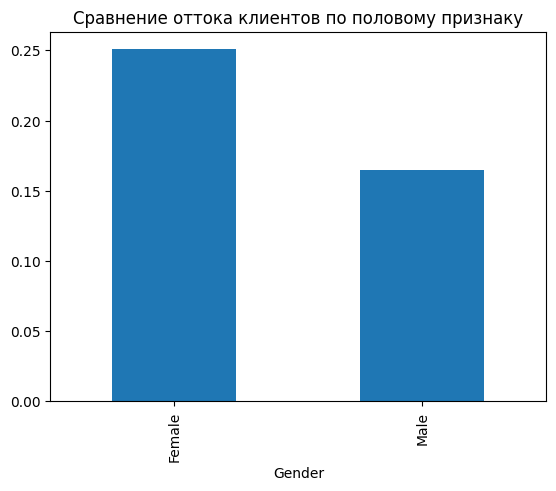

In [965]:
churn_data.groupby(['Gender'])['Exited'].mean().plot(
    kind='bar',
    title='Сравнение оттока клиентов по половому признаку'
    );

Женщины менее лояльны - уходит 25%

Из клиентов-мужчин уходит значительно меньше - 16%. 

## Задание 9.7

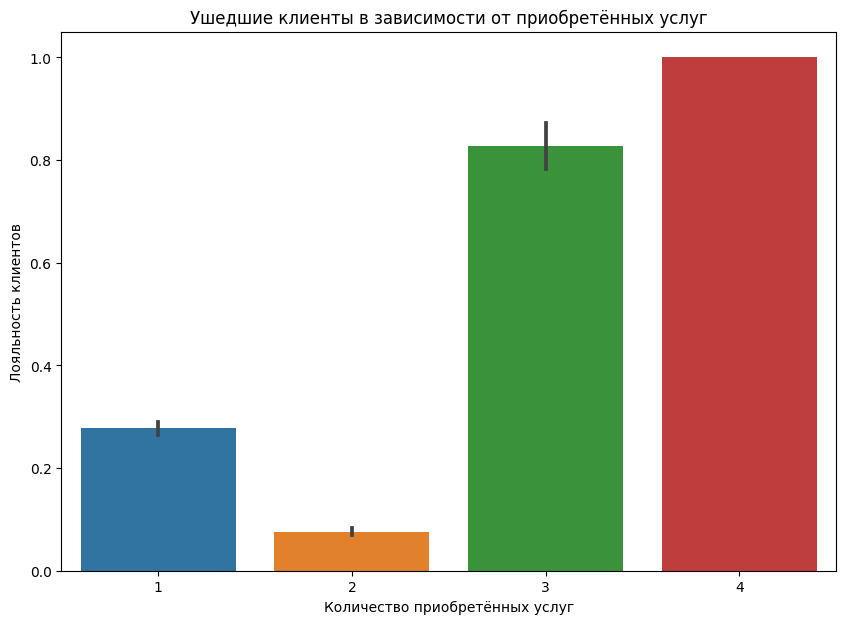

In [966]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
)
barplot.set_title('Ушедшие клиенты в зависимости от приобретённых услуг');
barplot.set_xlabel('Количество приобретённых услуг');
barplot.set_ylabel('Лояльность клиентов');

Минимальный отток клиентов среди тех, кто приобрёл у банка 2 услуги.

Количество ушедших клиентов после приобретения 3 услуг резко возрастает. А те, кто приобрёл у банка 4 услуги - ушли все клиенты этой категории.

Вероятно, у банка всего два вида услуг, которые реально могут заинтересовать клиентов.

## Задание 9.8

In [967]:
churn_data_location = churn_data.groupby('Geography', as_index=False).mean()
fig = px.choropleth(
    data_frame=churn_data_location,
    locations="Geography",                     # столбец с локациями
    locationmode = "country names",            # режим сопоставления локаций с базой Plotly
    color="Exited",                            # от чего зависит цвет
    title='Доля ушедших клиентов по странам',  # заголовок
    width=800,                                 # ширина
    height=500,                                # высота
)
fig.show()                                     # отображаем график

Наибольшее число ушедших клиентов зафиксировано в Германии - 32%

Возможно, это связано с недостаточным ассортиментом и качеством предлагаемых услуг, по сравнению с предлагаемыми услугами конкурентов на местном рынке.

## Задание 9.10

In [968]:
def get_credit_score_cat(credit_score):                 # функция разбиения кредитного рейтинга на категории
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)   # Добавляем категории кредитного рейтинга
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')         # преобразуем тип столбца


churn_data_heatmap = churn_data.pivot_table(      # создаём сводную таблицу для тепловой карты
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0
).round(3)

fig = px.imshow(                                  # строим тепловую карту
    churn_data_heatmap,
    color_continuous_scale='YlGnBu',
    labels=dict(x='Стаж клиента (лет)', y='Категория кредитного рейтинга', color='Доля оттока клиентов')
    )
fig.show()

Максимальный отток клиентов - клиенты с очень низким кредитным рейтингом в первый год обслуживания.

В дальнейшем повышенный отток клиентов этой же группы наблюдается через 3-4 года обслуживания, и после 10 лет обслуживания.